In [3]:
import kagglehub

path = kagglehub.dataset_download("anmolkumar/house-price-prediction-challenge")
print("Path to dataset files:", path)

100%|██████████| 2.13M/2.13M [00:00<00:00, 40.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/anmolkumar/house-price-prediction-challenge/versions/1


In [4]:
!mkdir /content/dataset/
!mv /root/.cache/kagglehub/datasets/anmolkumar/house-price-prediction-challenge/versions/1/* /content/dataset/

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv("/content/dataset/train.csv")
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [8]:
'''
Replace values:
  [POSTED_BY]
    Dealer -> 0
    Owner -> 1
    Builder -> 2
  [BHK_OR_RK]
    BHK -> 1  -> bedroom, hall, kitchen
    RK -> 0   -> room, kitchen
Delete [ADDRESS] -> already has coordinates
'''
data["POSTED_BY"] = data["POSTED_BY"].replace({"Dealer": 0, "Owner": 1, "Builder": 2})
data["BHK_OR_RK"] = data["BHK_OR_RK"].replace({"BHK": 1, "RK": 0})

data = data.drop('ADDRESS', axis=1)

<ipython-input-8-f814bf9ee807>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["POSTED_BY"] = data["POSTED_BY"].replace({"Dealer": 0, "Owner": 1, "Builder": 2})
<ipython-input-8-f814bf9ee807>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["BHK_OR_RK"] = data["BHK_OR_RK"].replace({"BHK": 1, "RK": 0})


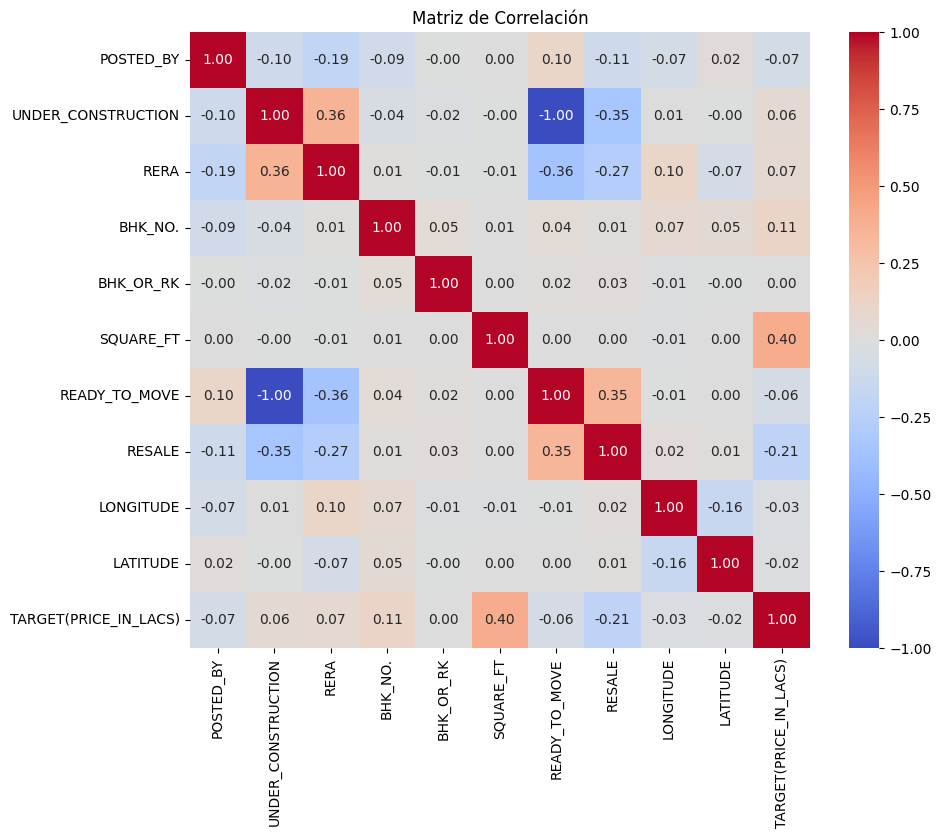

In [9]:
matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

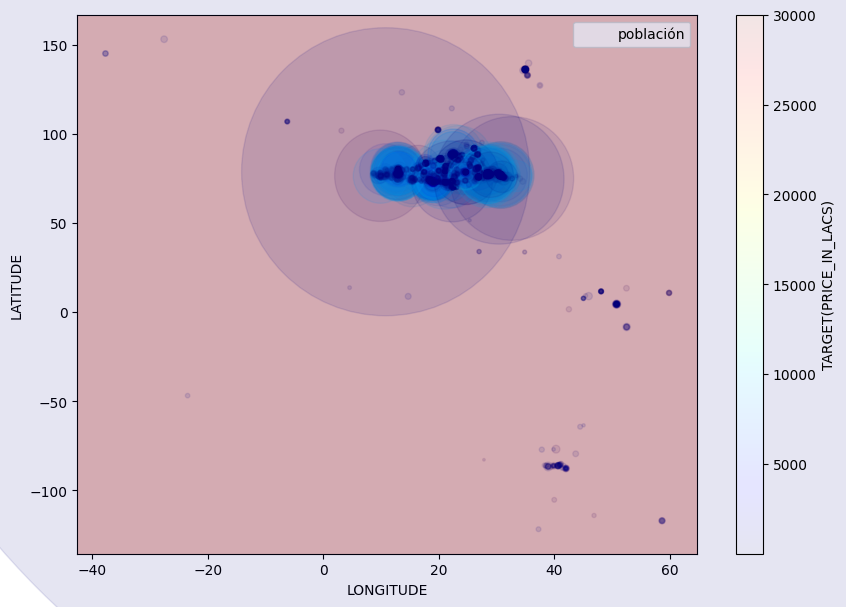

In [10]:
data.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.1,
            s=data["SQUARE_FT"]/100,label="población", figsize=(10,7),
             c="TARGET(PRICE_IN_LACS)", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Columnas con mayor relacion
work_columns = ['READY_TO_MOVE', 'RESALE', 'UNDER_CONSTRUCTION', 'SQUARE_FT', 'RERA']

X = data[work_columns]

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=work_columns)

y = data['TARGET(PRICE_IN_LACS)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 331790.07693744096
R-squared: 0.3910623954551218


In [13]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 410201.7879446781
R-squared: 0.2471526079480797


In [14]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 341828.6161434378
R-squared: 0.3726385653223654


In [15]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 533320.3643345188
R-squared: 0.021191868935559244


In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 134650.64714200792
R-squared: 0.7528743376597972


In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 163931.26422446265
R-squared: 0.6991353319898124


In [18]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 281226.5553299653
R-squared: 0.4838621259630804


In [19]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 334639.034148331
R-squared: 0.38583367615325626
